In [18]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import copy

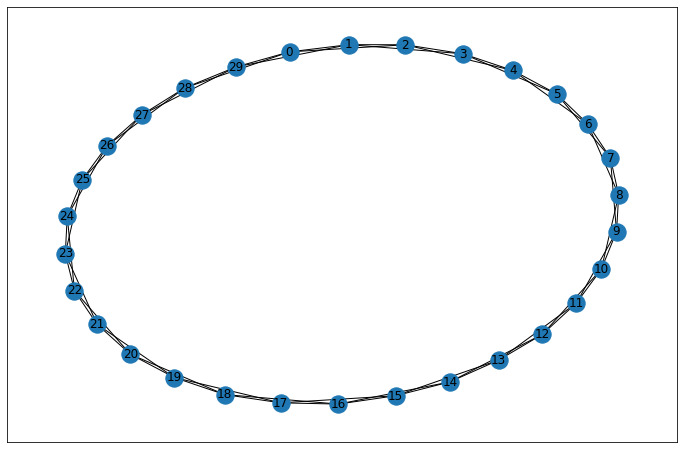

Average Shortest Path  4.137931034482759
Average Shortest Path  3.1862068965517243


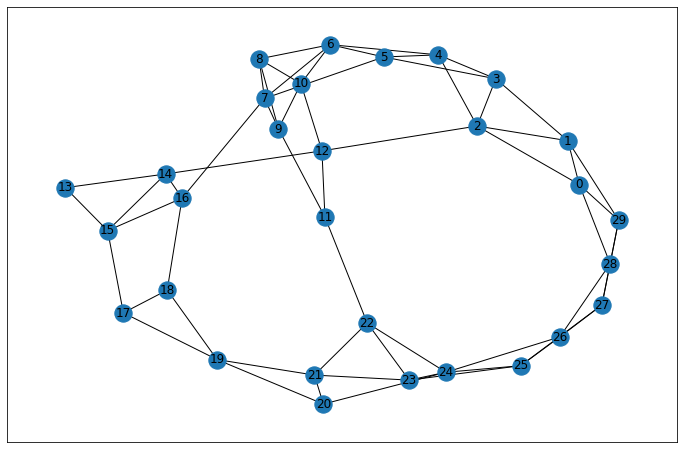

In [29]:
def swap(e1, e2, ed):
    e1s = [e1[0], e2[1]]
    e2s = [e2[0], e1[1]]
    if e1s not in ed and e2s not in ed:
        return e1s, e2s
    else:
        return e1, e2



def rewire_iter(ed, nodes, rw_p, preserve):
    count = 0
    rewires = [True if random.random()<rw_p else False for i in range(len(ed))]
    for idx,r in enumerate(rewires):
        if r and not preserve:
            temp_edge = [ed[idx][0], random.choice([i for i in nodes if i!=ed[idx][0]])]
            if temp_edge not in ed:
                ed[idx] = temp_edge
                count += 1
        if r and preserve:
            e1, e2 = swap(ed[idx][0], ed[idx][1], ed)
            if e1 != ed[idx][0] and e2 != ed[idx][1]:
                ed[idx] = [e1,e2]
                count += 1
    return ed, count



def rewire_wrapper(ed, nodes, rw_p, preserve=False):
    total_count = 0
    prior_count = -1
    current_count = 0
    while (total_count == 0) or \
            (total_count/len(ed) < rw_p and prior_count != current_count):
        prior_count = current_count
        ed, current_count = rewire_iter(ed,nodes, rw_p, preserve=False)
        total_count += current_count
    return ed



def build_ws(n, k, rw_p, plot=False):
    nodes = [i for i in range(n)]
    nX = []
    for offset in range(1, k+1):
        nX.append(nodes[offset:n] + nodes[:offset])
    edges = []
    for idx, node in enumerate(nodes):
        for j in nX:
            edges.append([node, j[idx]])

    for ij in range(len(edges)):
        edges[ij] = sorted(edges[ij])

    edges_new = rewire_wrapper(copy.deepcopy(edges), nodes, rw_p, preserve=True)

    if plot:
        G = nx.Graph()
        for edge in edges:
            G.add_edge(edge[0], edge[1])
        plt.figure(figsize=(12,8))
        nx.draw_networkx(G)
        plt.show()
        print('Average Shortest Path ', nx.average_shortest_path_length(G))
        G = nx.Graph()
        for edge in edges_new:
            G.add_edge(edge[0], edge[1])
        plt.figure(figsize=(12,8))
        nx.draw_networkx(G)
        print('Average Shortest Path ', nx.average_shortest_path_length(G))
        plt.show()

build_ws(30 , 2, 0.1, plot=True)